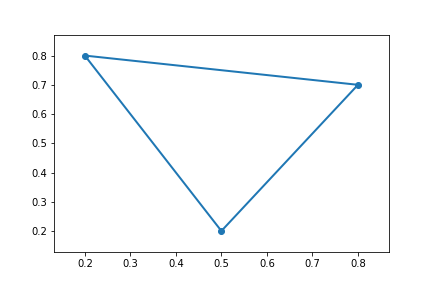

In [70]:
#Delaunay Triangle and Voronoi Diagram
#From Dive Into Algorithms by Tuckfield

def points_to_triangle(point1,point2,point3):
    triangle = [list(point1),list(point2),list(point3)]
    return(triangle)

def genlines(listpoints,itinerary):
    lines = []
    for j in range(len(itinerary)-1):
        lines.append([listpoints[itinerary[j]],listpoints[itinerary[j+1]]])
    return(lines)

import pylab as pl
from matplotlib import collections as mc
def plot_triangle_simple(triangle,thename):
    fig, ax = pl.subplots()
    
    xs = [triangle[0][0],triangle[1][0],triangle[2][0]]
    ys = [triangle[0][1],triangle[1][1],triangle[2][1]]
    
    itin=[0,1,2,0]
    
    thelines = genlines(triangle,itin)
    
    lc = mc.LineCollection(genlines(triangle,itin),linewidths=2)
    
    ax.add_collection(lc)
    
    ax.margins(0.1)
    pl.scatter(xs, ys)
    pl.savefig(str(thename) + '.png')
    pl.close()
    
plot_triangle_simple(points_to_triangle((0.2,0.8),(0.5,0.2),(0.8,0.7)),'tri')

import math
def get_distance(point1,point2):
    distance = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return(distance)

from IPython.display import Image
Image(filename='tri.png',width = 640,height = 640)

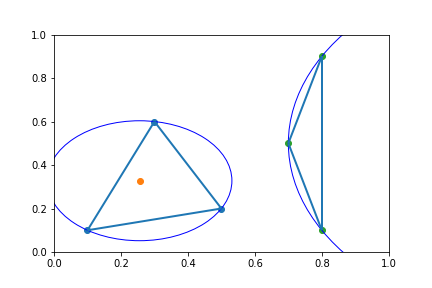

In [71]:
def triangle_to_circumcenter(triangle):
    x,y,z = complex(triangle[0][0],triangle[0][1]), complex(triangle[1][0],triangle[1][1]), \
    complex(triangle[2][0],triangle[2][1])
    w = z - x
    w /= y - x
    c = (x-y)*(w-abs(w)**2)/2j/w.imag - x
    radius = abs(c+x)
    return((0 - c.real, 0 - c.imag),radius)

def plot_triangle(triangles, centers, radii, thename):
    fig, ax = pl.subplots()
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    for i in range(0,len(triangles)):
        triangle = triangles[i]
        center = centers[i]
        radius = radii[i]
        itin = [0,1,2,0]
        thelines = genlines(triangle,itin)
        xs = [triangle[0][0],triangle[1][0],triangle[2][0]]
        ys = [triangle[0][1],triangle[1][1],triangle[2][1]]
        
        lc = mc.LineCollection(genlines(triangle,itin),linewidths = 2)
        
        ax.add_collection(lc)
        ax.margins(0.1)
        pl.scatter(xs, ys)
        pl.scatter(center[0],center[1])
        
        circle = pl.Circle(center, radius, color = 'b', fill = False)
        
        ax.add_artist(circle)
        
    pl.savefig(str(thename) + '.png')
    pl.close()
    
#lets try it out
triangle1 = points_to_triangle((0.1,0.1),(0.3,0.6),(0.5,0.2))
center1,radius1 = triangle_to_circumcenter(triangle1)
triangle2 = points_to_triangle((0.8,0.1),(0.7,0.5),(0.8,0.9))
center2,radius2 = triangle_to_circumcenter(triangle2)
plot_triangle([triangle1,triangle2],[center1,center2],[radius1,radius2],'two')

Image(filename='two.png',width = 640,height = 640)

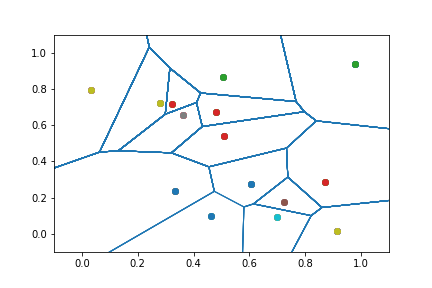

In [72]:
#Ok, now the Delaunay function

def gen_delaunay(points):
    delaunay = [points_to_triangle([-5,-5],[-5,10],[10,-5])]
    number_of_points = 0
    
    while number_of_points < len(points):
        point_to_add = points[number_of_points]
        
        delaunay_index = 0

        invalid_triangles = []
        while delaunay_index < len(delaunay):
            #print(len(delaunay))           
            circumcenter,radius = triangle_to_circumcenter(delaunay[delaunay_index])
            new_distance = get_distance(circumcenter,point_to_add)
            if(new_distance < radius):
                #print(delaunay[delaunay_index])
                invalid_triangles.append(delaunay[delaunay_index])
            delaunay_index += 1
            
        points_in_invalid = []
        for i in range(0,len(invalid_triangles)):
            delaunay.remove(invalid_triangles[i])
            for j in range(0,len(invalid_triangles[i])):
                points_in_invalid.append(invalid_triangles[i][j])
        #points_in_invalid = [list(x) for x in set(tuple(x) for x in points_in_invalid)]
        #The point of the previous line is to remove duplicate points in the invalid point list
        i = 0
        while i < len(points_in_invalid):
            j = 0
            while j < len(points_in_invalid):
                if((points_in_invalid[i][0] == points_in_invalid[j][0]) and (points_in_invalid[i][1]  \
                    == points_in_invalid[j][1]) and (i != j)):
                    del points_in_invalid[j]
                j += 1
            i += 1
        #print(points_in_invalid)

            
        for i in range(0,len(points_in_invalid)):
            for j in range(i + 1,len(points_in_invalid)):
                #count the number of times both of these are in bad triangles
                count_occurrences = 0
                for k in range(0,len(invalid_triangles)):
                    count_occurrences += 1 * (points_in_invalid[i] in invalid_triangles[k])* \
                    (points_in_invalid[j] in invalid_triangles[k])
                if(count_occurrences == 1):
                    delaunay.append(points_to_triangle(points_in_invalid[i], \
                    points_in_invalid[j], point_to_add))
                        
        number_of_points += 1
    return(delaunay)


N = 15
import numpy as np
np.random.seed(5201314)
xs = np.random.rand(N)
ys = np.random.rand(N)
points = zip(xs,ys)
listpoints = list(points)
the_delaunay = gen_delaunay(listpoints)

#plotting function
def plot_triangle_circum(triangles,centers,plotcircles,plotpoints, \
                        plottriangles,plotvoronoi,plotvpoints,thename):
    fig, ax = pl.subplots()
    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    
    lines=[]
    for i in range(0,len(triangles)):
        triangle = triangles[i]
        center = centers[i][0]
        radius = centers[i][1]
        itin = [0,1,2,0]
        thelines = genlines(triangle,itin)
        xs = [triangle[0][0],triangle[1][0],triangle[2][0]]
        ys = [triangle[0][1],triangle[1][1],triangle[2][1]]
        
        lc = mc.LineCollection(genlines(triangle,itin),linewidths=2)
        if(plottriangles):
            ax.add_collection(lc)
        if(plotpoints):
            pl.scatter(xs,ys)
            
        ax.margins(0.1)
        
        if(plotvpoints):
            pl.scatter(center[0],center[1])
            
        circle = pl.Circle(center, radius, color = 'b', fill = False)
        if(plotcircles):
            ax.add_artist(circle)
            
        if(plotvoronoi):
            for j in range(0,len(triangles)):
                commonpoints = 0
                for k in range(0,len(triangles[i])):
                    for n in range(0,len(triangles[j])):
                        if triangles[i][k] == triangles[j][n]:
                            commonpoints += 1
                if commonpoints == 2:
                    lines.append([list(centers[i][0]),list(centers[j][0])])
                    
        lc = mc.LineCollection(lines, linewidths = 1)
        
        ax.add_collection(lc)
        
    pl.savefig(str(thename) + '.png')
    pl.close()
    

circumcenters = []
for i in range(0,len(the_delaunay)):
    circumcenters.append(triangle_to_circumcenter(the_delaunay[i]))
    
plot_triangle_circum(the_delaunay,circumcenters,False,True,False,True,False,'final')
    
Image(filename='final.png',width = 640,height = 640)


In [73]:
#For GDscript need to eliminate some of the python stuff, like complex numbers
#Will attempt to calculate circumcenter of triangles another way
#Using code form Geeks for Geeks website, by Mohit Kumar

#Function to find a line given two points
def lineFromPoints(P,Q,a,b,c):
    a = Q[1]-P[1]
    b = P[0]-Q[0]
    c = a * (P[0]) + b * (P[1])
    return a, b, c

#Function which converts input line into its perpindicular bisector
def perpendicularBisectorFromLine(P,Q,a,b,c):
    mid_point = [(P[0] + Q[0])/2,(P[1] + Q[1])/2]
    #print("P is")
    #print(P)
    #print("Q is")
    #print(Q)
    #print("Midpoint is")
    #print(mid_point)
    #print("Odd, try again for mid x")
    #print((P[0]+Q[0])/2)
    #c = -bx + ay
    c = -b * (mid_point[0]) + a * (mid_point[1])
    temp = a
    a = -b
    b = temp
    return a, b, c

#Returns the intersection point of two lines
def lineLineIntersection(a1,b1,c1,a2,b2,c2):
    determinant = a1 * b2 - a2 * b1
    #print("Determinant is")
    #print(determinant)
    if(determinant == 0):
        #lines are parallel, return large number
        return[(10.0)**19,(10.0)**19]
    else:
        x = (b2*c1 - b1*c2)/determinant
        y = (a1*c2 - a2*c1)/determinant
        #print("x is")
        #print(x)
        #print("y is")
        #print(y)
        return[x,y]
    
#Find the circumcenter
def findCircumCenter(P,Q,R):
    
    #Line PQ given by ax + by = c
    a, b, c = 0.0,0.0,0.0
    a, b, c = lineFromPoints(P,Q,a,b,c)
    
    #Line QR is represented as ex + fy = g
    e, f, g = 0.0,0.0,0.0
    e, f, g = lineFromPoints(Q,R,e,f,g)
    
    #Converting lines PQ and QR to perpendicular bisectors
    #After this,
    #L = ax + by = c
    #M = ex + fy = g
    a, b, c = perpendicularBisectorFromLine(P,Q,a,b,c)
    e, f, g = perpendicularBisectorFromLine(Q,R,e,f,g)
    
    #The point of intersection of L and M gives the circumcenter
    circumcenter = lineLineIntersection(a,b,c,e,f,g)
    
    if(circumcenter[0] == (10.0)**19 and circumcenter[1] == (10.0)**19):
        print("Error")
    else:
        return circumcenter
    
#Ok, lets test this
P = [6,0]
Q = [0,0]
R = [0,8]
print(findCircumCenter(P,Q,R))

[3.0, 4.0]


([0.25555555555555554, 0.3277777777777778], 0.2758264797179202)
[0.25555555555555554, 0.3277777777777778]
[1.5499999999999992, 0.5]


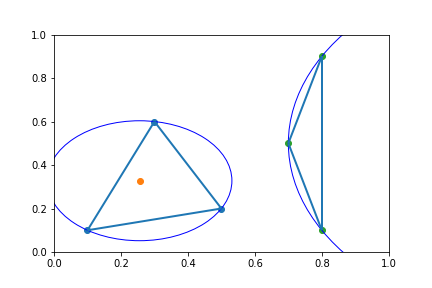

In [74]:
#New circumcenter function for triangle
def findTriangleCircumCenter(triangle):
    
    #Break out individual points
    P = triangle[0]
    Q = triangle[1]
    R = triangle[2]
    #print("Triangle points")
    #print(P)
    #print(Q)
    #print(R)
    
    #Line PQ given by ax + by = c
    a, b, c = 0.0,0.0,0.0
    a, b, c = lineFromPoints(P,Q,a,b,c)
    
    #print("Line 1 is")
    #print(a,b,c)
    
    #Line QR is represented as ex + fy = g
    e, f, g = 0.0,0.0,0.0
    e, f, g = lineFromPoints(Q,R,e,f,g)
    
    #print("Line 2 is")
    #print(e,f,g)

    #Converting lines PQ and QR to perpendicular bisectors
    #After this,
    #L = ax + by = c
    #M = ex + fy = g
    a, b, c = perpendicularBisectorFromLine(P,Q,a,b,c)
    e, f, g = perpendicularBisectorFromLine(Q,R,e,f,g)
    
    #print("Bisector Line 1 is")
    #print(a,b,c)
    
    #print("Bisector Line 2 is")
    #print(e,f,g)
    
    #The point of intersection of L and M gives the circumcenter
    circumcenter = lineLineIntersection(a,b,c,e,f,g)
    
    #print("Circumcenter is")
    #print(circumcenter)
    
    #obtain radius
    radius = get_distance(circumcenter,P)
    
    if(circumcenter[0] == (10.0)**19 and circumcenter[1] == (10.0)**19):
        print("Error")
    else:
        return circumcenter,radius
    
#Ok, lets test this
P = [0.1,0.1]
Q = [0.3,0.6]
R = [0.5,0.2]
print(findTriangleCircumCenter(points_to_triangle(P,Q,R)))
    
#lets try it out
triangle1 = points_to_triangle((0.1,0.1),(0.3,0.6),(0.5,0.2))
center1,radius1 = findTriangleCircumCenter(triangle1)
print(center1)
triangle2 = points_to_triangle((0.8,0.1),(0.7,0.5),(0.8,0.9))
center2,radius2 = findTriangleCircumCenter(triangle2)
print(center2)
plot_triangle([triangle1,triangle2],[center1,center2],[radius1,radius2],'two2')

Image(filename='two2.png',width = 640,height = 640)

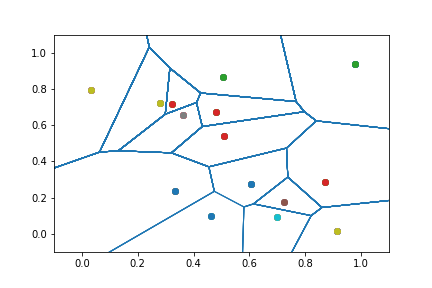

In [75]:
circumcenters = []
for i in range(0,len(the_delaunay)):
    circumcenters.append(findTriangleCircumCenter(the_delaunay[i]))
    
plot_triangle_circum(the_delaunay,circumcenters,False,True,False,True,False,'final2')
    
Image(filename='final2.png',width = 640,height = 640)